In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('C:\\Training\\Phase 1\\Dataset\\OnlineRetail.csv',encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df['TotalSales']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [5]:
country1 , country2 = 'United Kingdom' , 'France'
sales_country1 = df[df['Country'] == country1]["TotalSales"]
sales_country2 = df[df['Country'] == country2]["TotalSales"]

In [6]:
t_test , p_value = ttest_ind(sales_country1, sales_country2, equal_var=False)
print(f"T_test_statictics: {t_test:.4f}  p_value: {p_value:.4f}")

T_test_statictics: -4.7237  p_value: 0.0000


In [8]:
if p_value < 0.05:
    print("Reject null hypothesis: Sales differ significantly between the two countries.")
else:
    print("Fail to reject null hypothesis: No significant difference in sales.")

Reject null hypothesis: Sales differ significantly between the two countries.


Text(0.5, 1.0, 'Sales comparison between UnitedKingdom and France')

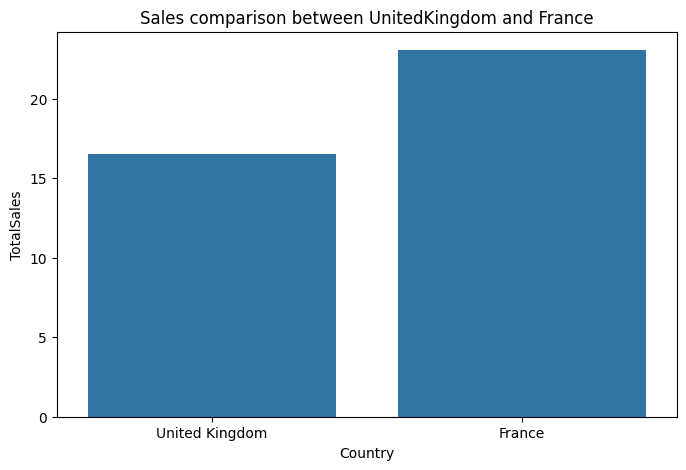

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='Country', y='TotalSales', data=df[df["Country"].isin([country1, country2])], errorbar=None)
plt.title('Sales comparison between UnitedKingdom and France')
